<a href="https://colab.research.google.com/github/Marianagb7/DevOps_initial/blob/main/Ejercicio_2_M2S3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Actividad 2: Generación de datos sintéticos con Autoencoders
Implementa un Autoencoder simple para comprimir y reconstruir datos sintéticos. Usa la salida para generar nuevas instancias artificiales.

¿Qué harás?

Crear un Autoencoder usando Keras.
Entrenar el modelo sobre un dataset sintético.
Reconstruir instancias y evaluar la calidad de los datos generados.
Ejecuta código Python en Trinket
👉 Abrir Trinket - Python 3 Online

Objetivo del ejercicio:

Comprender cómo un Autoencoder puede aprender representaciones comprimidas.
Explorar la generación de datos sintéticos a partir del codificador.
🔍 Comprueba tu código
Valida si implementaste correctamente un Autoencoder básico para reconstrucción de datos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

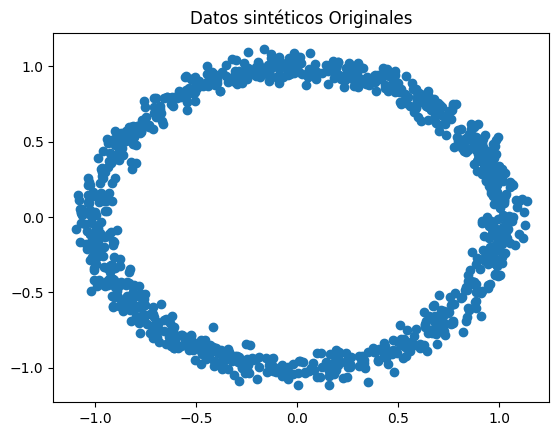

In [ ]:
def generar_datos(n=1000):
  angles = 2 * np.pi * np.random.rand(n)
  x = np.cos(angles) + 0.05 * np.random.randn(n)
  y = np.sin(angles) + 0.05 * np.random.randn(n)
  return np.stack((x, y), axis=1)

datos = generar_datos(1000)

plt.scatter(datos[:, 0], datos[:, 1])
plt.title("Datos sintéticos Originales")
plt.show()

In [ ]:
entrada = Input(shape=(2,))
codificado = Dense(3, activation='tanh')(entrada)
decodificado = Dense(2, activation='linear')(codificado)

autoencoder = Model(entrada, decodificado)
autoencoder.compile(optimizer=Adam(), loss='mse')


In [ ]:
autoencoder.fit(datos, datos, epochs=50, batch_size=32, verbose=0)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


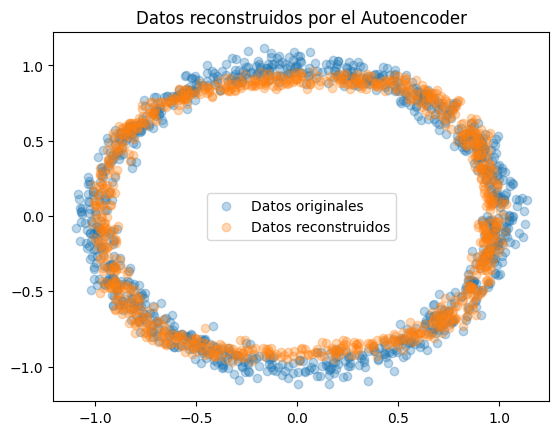

In [ ]:
datos_reconstruidos = autoencoder.predict(datos)

plt.scatter(datos[:, 0], datos[:, 1], alpha=0.3, label='Datos originales')
plt.scatter(datos_reconstruidos[:, 0], datos_reconstruidos[:, 1], alpha=0.3, label='Datos reconstruidos')
plt.legend()
plt.title("Datos reconstruidos por el Autoencoder")
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


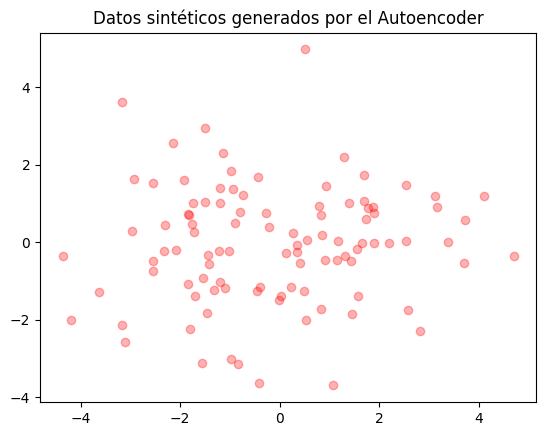

In [ ]:
codificador = Model(entrada, codificado)

#crear el codificador
entrada_codificada = Input(shape=(1,))
salida_decodificada = autoencoder.layers[-1](entrada_codificada)
decodificador = Model(entrada_codificada, salida_decodificada)

#Generar nuevos puntos artificiales en el espacio comprimido
valores_latentes = np.linspace(-1.5, 1.5, 100).reshape(-1, 1)
datos_sinteticos = decodificador.predict(valores_latentes)

plt.scatter(datos_sinteticos[:, 0], datos_sinteticos[:, 1], alpha=0.3, label='Datos sintéticos', color='red')
plt.t